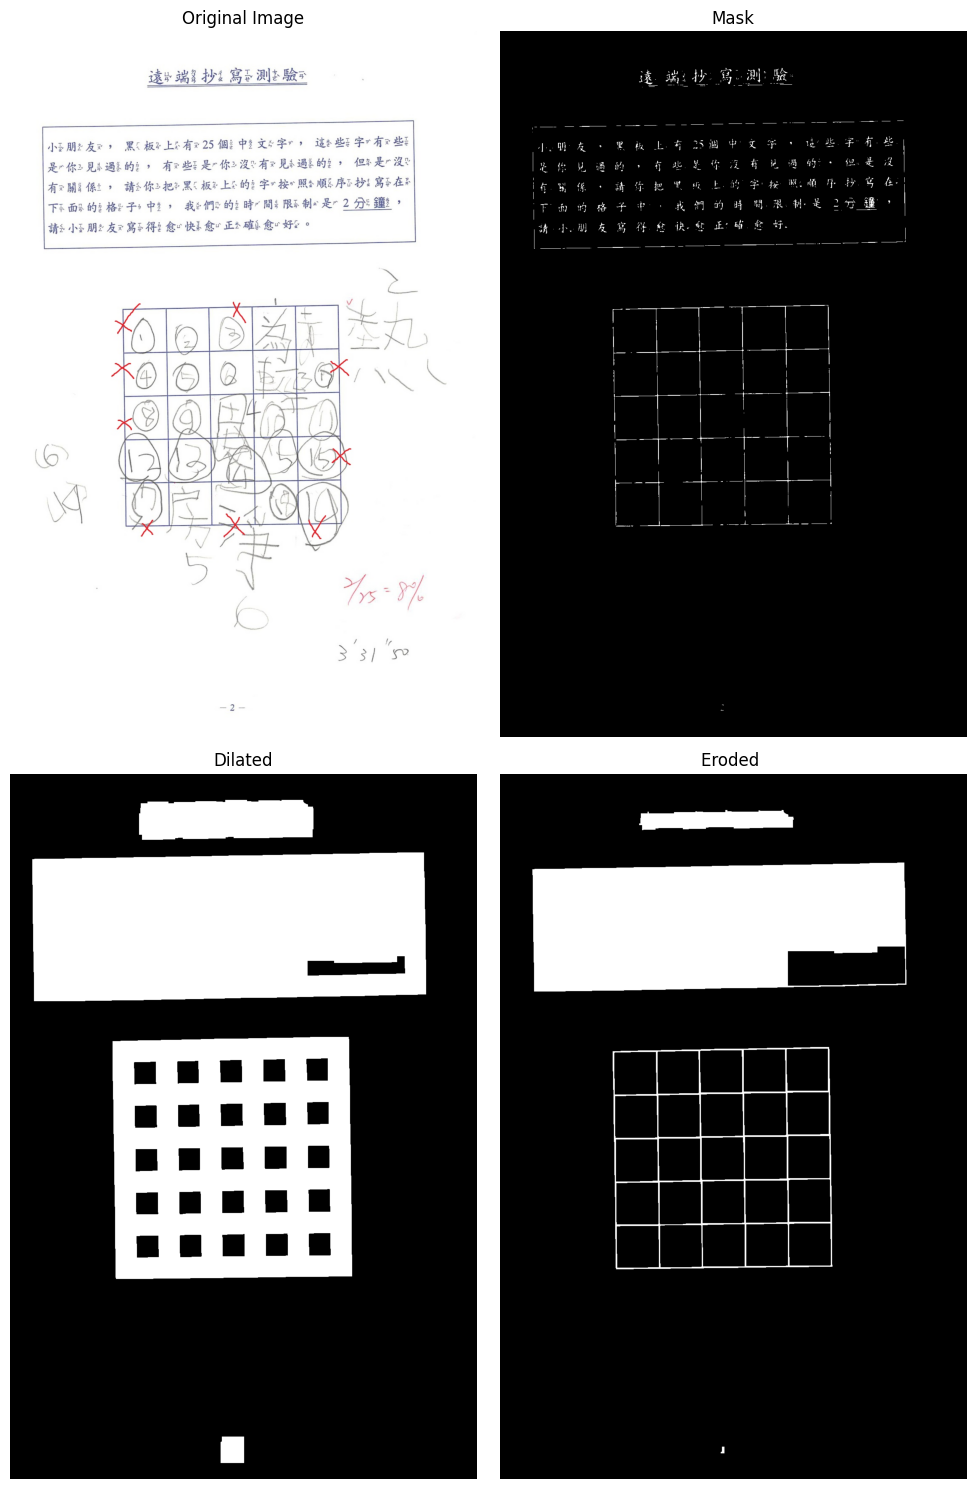

In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 讀取圖片
image_path = "02_image.jpg"
image = cv2.imread(image_path)

# 將圖片轉換為 HSV 色彩空間
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# 定義藍色網格線的範圍（可根據網格顏色進行調整）
lower_blue = (100,50,50)
upper_blue = (140,255,255)

# 創建遮罩來檢測網格線
mask = cv2.inRange(hsv_image, lower_blue, upper_blue)

# 膨脹操作
kernel = np.ones((50,50), np.uint8)  # 調整 kernel 大小控制膨脹程度
dilated = cv2.dilate(mask, kernel, iterations=1)

# 侵蝕操作
kernel = np.ones((48,48), np.uint8)
eroded = cv2.erode(dilated, kernel, iterations=1)

result = eroded

# 顯示結果
plt.figure(figsize=(10, 15))

# 原圖
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

# 遮罩
plt.subplot(2, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title("Mask")
plt.axis("off")

# 膨脹後
plt.subplot(2, 2, 3)
plt.imshow(dilated, cmap='gray')
plt.title("Dilated")
plt.axis("off")

# 最終結果（侵蝕後）
plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(eroded, cv2.COLOR_BGR2RGB))
plt.title("Eroded ")
plt.axis("off")

plt.tight_layout()
plt.show()


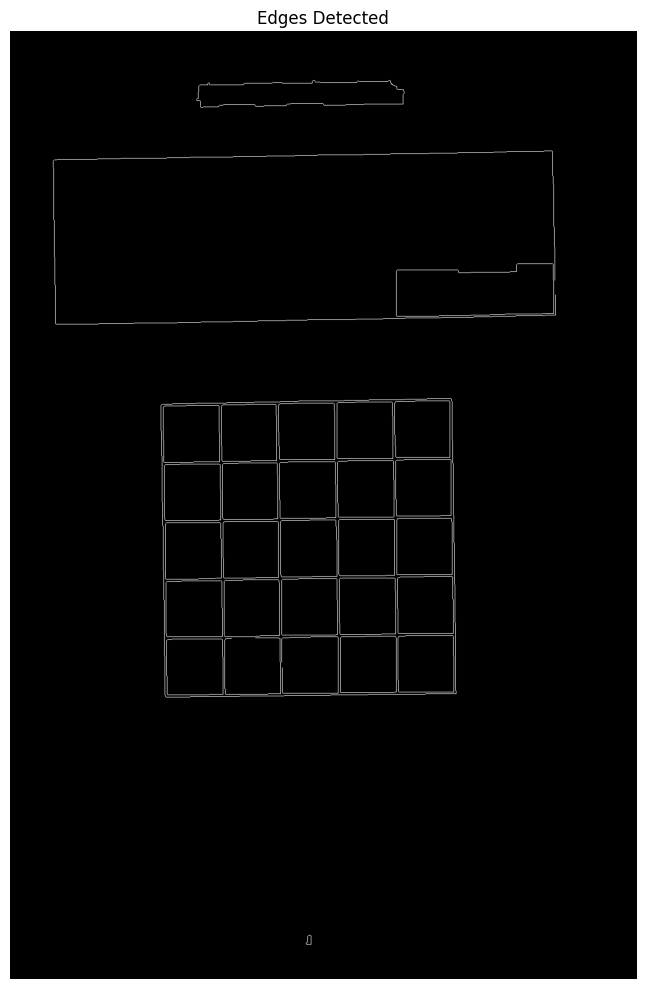

In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

gray = result

edges = cv2.Canny(gray, 50, 150)

plt.figure(figsize=(10, 10))
plt.subplot(1, 1, 1)
plt.imshow(edges, cmap='gray')
plt.title("Edges Detected")
plt.axis("off")
plt.tight_layout()
plt.show()



[(267, 663), (781, 651), (790, 1174), (276, 1180)]


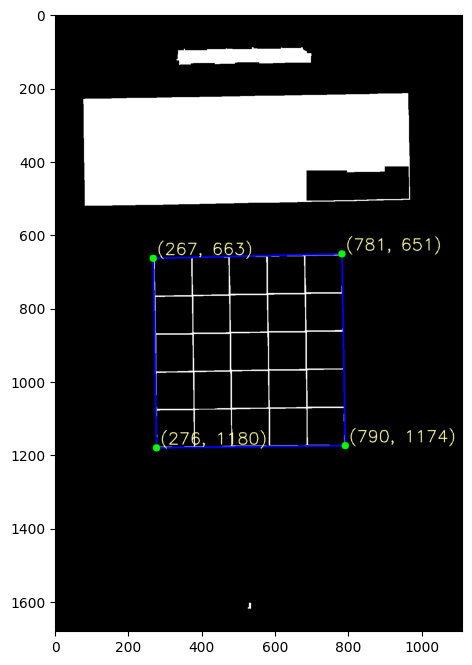

In [50]:
# 在邊緣中尋找輪廓
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 找到最大的矩形輪廓（假設它是桌子）
largest_contour = max(contours, key=cv2.contourArea)

# 近似輪廓以獲取角點
epsilon = 0.02 * cv2.arcLength(largest_contour, True)
approx = cv2.approxPolyDP(largest_contour, epsilon, True)

# 提取角點
corner_points = approx.reshape(-1, 2)

# 排序點以確保一致的順序（左上、右上、右下、左下）
def order_points(pts):
    rect = np.zeros((4, 2), dtype="float32")
    s = pts.sum(axis=1)
    rect[0] = pts[np.argmin(s)]  # 左上
    rect[2] = pts[np.argmax(s)]  # 右下

    diff = np.diff(pts, axis=1)
    rect[1] = pts[np.argmin(diff)]  # 右上
    rect[3] = pts[np.argmax(diff)]  # 左下
    return rect

ordered_corners = order_points(corner_points)

# 輸出角點的坐標
ordered_corners.tolist()

corners = ordered_corners.tolist()

# 如果圖像是灰度的，則將其轉換為彩色
annotated_image = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR) if len(gray.shape) == 2 else gray.copy()

# 將角點轉換為整數元組
corner_tuples = [tuple(map(int, point)) for point in ordered_corners]
print(corner_tuples)

# 畫出連接角點的線
cv2.polylines(annotated_image, [np.array(corner_tuples, dtype=np.int32)], isClosed=True, color=(0, 0, 255), thickness=3)

# 畫出角點並標註其坐標
for point in corner_tuples:
    cv2.circle(annotated_image, point, radius=10, color=(0, 255, 0), thickness=-1)
    cv2.putText(annotated_image, f"({point[0]}, {point[1]})", (point[0] + 10, point[1] - 10), 
                cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255, 255, 155), 2)

plt.figure(figsize=(8,8))
plt.imshow(annotated_image)

